In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import gender_guesser.detector as gender
from tqdm.notebook import tqdm
from matplotlib.lines import Line2D
import random
from numpy.random import normal as norm

In [2]:
# for better simulations (be careful: 200 times longer)
# Nsim = 100
# k_range = [i / 100 for i in range(1, 101)]

# fixed biases [d-color, d-shape]
# -0.5 => green are perceived of having higher quality
# 1.5 => stars are perceived of having lower quality
d = [-0.5, 1.5]

# there are equal number of stars and circles i.e. N
# out of which f * N are green circles and (1 - f) * N are orange circles
# out of which f * N are orange stars and (1 - f) * N are green stars
# [f, (1 - f)]
f = [0.2, 0.8]

In [3]:
# Genetare biased distribution
# real quality q0 is from N(0, 1)
# d - discrimination against 1s
# f - fraction of indviduals having property having hidden (second) property
# N - number of people

def generate(d = [0.5, 0.5], f = [0.5, 0.5], N = [2000, 2000]):
    # size of groups
    s = [(1 - f[0]) * N[0], f[0] * N[0], (1 - f[1]) * N[1], f[1] * N[1]]
    s = [int(x) for x in s]

    # vector of properties
    a = [(0,0)] * s[0] + [(0,1)] * s[1] + [(1,0)] * s[2] + [(1,1)] * s[3]

    m = 0
    st = 1
    q0 = norm(m, st, len(a))

    # creating bias
    bias = [0 for i in range(s[0])] + [-d[1] * st for i in range(s[1])] + [-d[0] * st for i in range(s[2])] + [-d[1] * st - d[0] * st for i in range(s[3])]
    q = q0 + bias

    # shuffling the results
    rnd = [x for x in range(len(a))]
    random.shuffle(rnd)

    q = [q[i] for i in rnd]
    a = [a[i] for i in rnd]
    q0 = [q0[i] for i in rnd]

    # return vectors of properties, perceived qualities and real qualities
    return a, q, q0

In [4]:
def conv_to_df(a, q):
    data = list(zip(list(list(zip(*a))[0]), list(list(zip(*a))[1]), q))
    return pd.DataFrame(data, columns=['color', 'shape', 'perceived_quality'])

In [5]:
a, q, q0 = generate(d, f)
df = conv_to_df(a, q)

Text(0, 1, 'frequency')

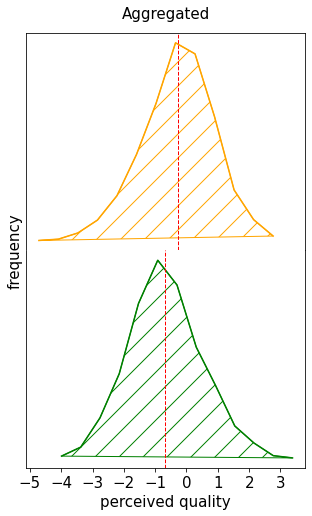

In [34]:
color = ['orange', 'green']
shape = ['o', '*']

summary = {
    (0, 0): {'mean': 0, 'std': 0, 'count': 0},
    (0, 1): {'mean': 0, 'std': 0, 'count': 0},
    (1, 0): {'mean': 0, 'std': 0, 'count': 0},
    (1, 1): {'mean': 0, 'std': 0, 'count': 0}
}

title = ['White', "Colored"]

fig, axis = plt.subplots(nrows=2, sharex=True, figsize=(5, 8))
# fig.suptitle('Aggregated', fontsize=15)
plt.subplots_adjust(hspace=0)
l = []

for i in [0, 1]:
    subset = df[(df['color'] == i)]['perceived_quality']
    y, binEdges = np.histogram(subset, bins=13)
    bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
    # axis[i].axis([5, 13, 0, 22000])
    axis[i].plot(bincenters, y, '-', c=color[i])
    axis[i].fill(bincenters, y, hatch='/', fill=False, color=color[i])
    axis[i].axvline(subset.mean(), color='r', linestyle='dashed', linewidth=1)
    # axis[i].get_yaxis().set_visible(False)
    axis[i].set_yticks([])
    axis[i].get_xaxis().set_visible(False) if i != 1 else axis[i].get_xaxis().set_visible(True)
    axis[i].spines['bottom'].set_visible(False) if i != 1 else axis[i].spines['top'].set_visible(False)

    # if i == 0:
    #         colors = ['black', 'black']
    #         line = []
    #         lines = [
    #             Line2D([0], [0], color='orange', linewidth=0, marker='s', fillstyle='full', markersize=10),
    #             Line2D([0], [0], color='green', linewidth=0, marker='s', fillstyle='full', markersize=10)
    #         ]
    #         labels = ['US', 'Non-US', 'Male', 'Female']
    #         axis[i].legend(lines, labels, loc=1, prop={'size': 10}, labelspacing=1.5, edgecolor='none')

plt.title('Aggregated', fontsize=15, y=2.04)
plt.xlabel('perceived quality', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('frequency', y=1, fontsize=15)

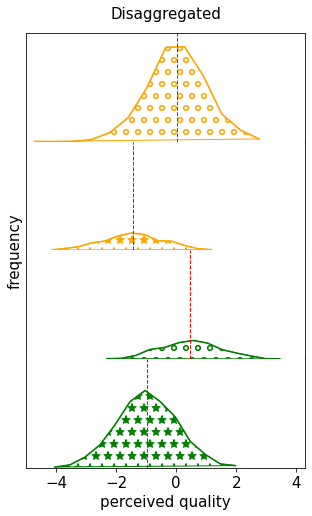

In [35]:
color = ['orange', 'green']
shape = ['o', '*']

summary = {
    (0, 0): {'mean': 0, 'std': 0},
    (0, 1): {'mean': 0, 'std': 0},
    (1, 0): {'mean': 0, 'std': 0},
    (1, 1): {'mean': 0, 'std': 0}
}

fig, axis = plt.subplots(nrows=4, sharex=True, figsize=(5, 8))
plt.subplots_adjust(hspace=0)

title = [['White Females', 'White Males'], ['Colored Females', 'Colored Males']]

iter = 0

for i in [0, 1]:
    for j in [0, 1]:
        subset = df[(df['color'] == i) & (df['shape'] == j)]['perceived_quality']
        summary[(i, j)] = {'mean': np.mean(subset), 'std': np.std(subset), 'count': subset.shape[0]}

        y, binEdges = np.histogram(subset, bins=13)
        bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
        if i == 1:
            axis[iter].axis([-5, 4.3, 0, 450])
        else:
            axis[iter].axis([-5, 4.3, 0, 450])
        axis[iter].plot(bincenters, y, '-', c=color[i])
        axis[iter].fill(bincenters, y, hatch=shape[j], fill=False, color=color[i])
        axis[iter].axvline(subset.mean(), color='r', linestyle='dashed', linewidth=1)
        axis[iter].get_xaxis().set_visible(False) if iter != 3 else axis[iter].get_xaxis().set_visible(True)
        axis[iter].set_yticks([])
        if (i, j) in [(0, 1), (1, 0)]:
            axis[iter].spines['bottom'].set_visible(False)
            axis[iter].spines['top'].set_visible(False)
        elif (i, j) ==  (1,1):
            axis[iter].spines['top'].set_visible(False)

        # if (i, j) == (0, 0):
        #     colors = ['black', 'black']
        #     line = []
        #     lines = [
        #         Line2D([0], [0], color='black', linewidth=0, marker='o', fillstyle='full', markersize=10),
        #         Line2D([0], [0], color='black', linewidth=0, marker='*', fillstyle='full', markersize=10)
        #     ]
        #     labels = ['Male', 'Female']
        #     axis[iter].legend(lines, labels, loc=1, prop={'size': 10}, labelspacing=1.5, edgecolor='none')

        iter += 1

plt.title('Disaggregated', fontsize=15, y=4.08)
plt.xlabel('perceived quality', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('frequency', y=2, fontsize=15)
plt.show()

In [40]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df['color'], df['shape'])
print('Pearsons correlation: %.3f' % corr)


Pearsons correlation: 0.600
Pearsons correlation:  0.0


In [22]:
res_main = np.load('results_synth_main.npy', allow_pickle='TRUE').item()
res_pre = np.load('results_pre_synth.npy', allow_pickle='TRUE').item()
res_in = np.load('results_deltr_synth.npy', allow_pickle='TRUE').item()
res_post = np.load('results_fair_synth.npy', allow_pickle='TRUE').item()
res = [res_main, res_pre, res_in, res_post]
res

[{'agg': {'original': {0: [0.2304615384615384,
     0.21141255230125516,
     0.22247334851936212,
     0.22410704225352104,
     0.23830774731823584,
     0.22741203079884492,
     0.2274573849878933,
     0.207481236970118,
     0.22483099450884675,
     0.18752251223491018,
     0.16890828837665514,
     0.14576083072800344,
     0.12296642066420656,
     0.10847612732095482,
     0.09616829869672408,
     0.07166357354392884,
     0.05771636307502311,
     0.0458565280604826,
     0.02277254740313268,
     0.00698965876530339],
    1: [-0.230576826874976,
     -0.21151831145698372,
     -0.22258464083978208,
     -0.22421915182943586,
     -0.2384269607986354,
     -0.22752579369569292,
     -0.22757117057318008,
     -0.2075850294848606,
     -0.22494346624196787,
     -0.18761632039510787,
     -0.16899278476903978,
     -0.1458337476018045,
     -0.12302793463152246,
     -0.10853039251721355,
     -0.09621640690017433,
     -0.07169942325555671,
     -0.057745235692869615,
    

In [74]:
k_range = [i / 100 for i in range(1, 101, 5)]

def plot_aggregated(title, axis, results):
    colors = ['orange', 'green']
    styles = {'original': '-', 'debiased': '--'}
    for approach in ['original', 'debiased']:
        for group in [0, 1]:
            axis.plot(k_range, results[approach][group], color = colors[group], ls = styles[approach])

    axis.axhline(0, color='k', linestyle='dashed', linewidth=1)
    axis.set_xlabel('top k', fontsize=12)
    axis.set_ylabel('representation bias', fontsize=12)
    # axis.axis([0, 1, -.35, .35])
    axis.tick_params(labelsize=12)
    axis.set_title(title)

def plot_disaggregated(axis, results):
    groups = [(0,0),(0,1),(1,0),(1,1)]
    fill = {'original': 'full', 'debiased': 'none'}
    colors = ['orange', 'green']
    shapes = ['o', '*']
    for g in groups:
        for approach in ['original', 'debiased']:
            axis.plot(k_range, results[approach][g], shapes[g[1]], color = colors[g[0]], lw = 2, fillstyle = fill[approach])

    axis.axhline(0, color='k', linestyle='dashed', linewidth=1)
    axis.fill_between(k_range, results['debiased'][(0,1)], results['original'][(0,1)], color='orange', alpha=.25)
    # axis.axis([0, 1, -1.5, 6])
    axis.set_xlabel('top k', fontsize=12)
    axis.set_ylabel('representation bias', fontsize=12)
    axis.tick_params(labelsize=12)

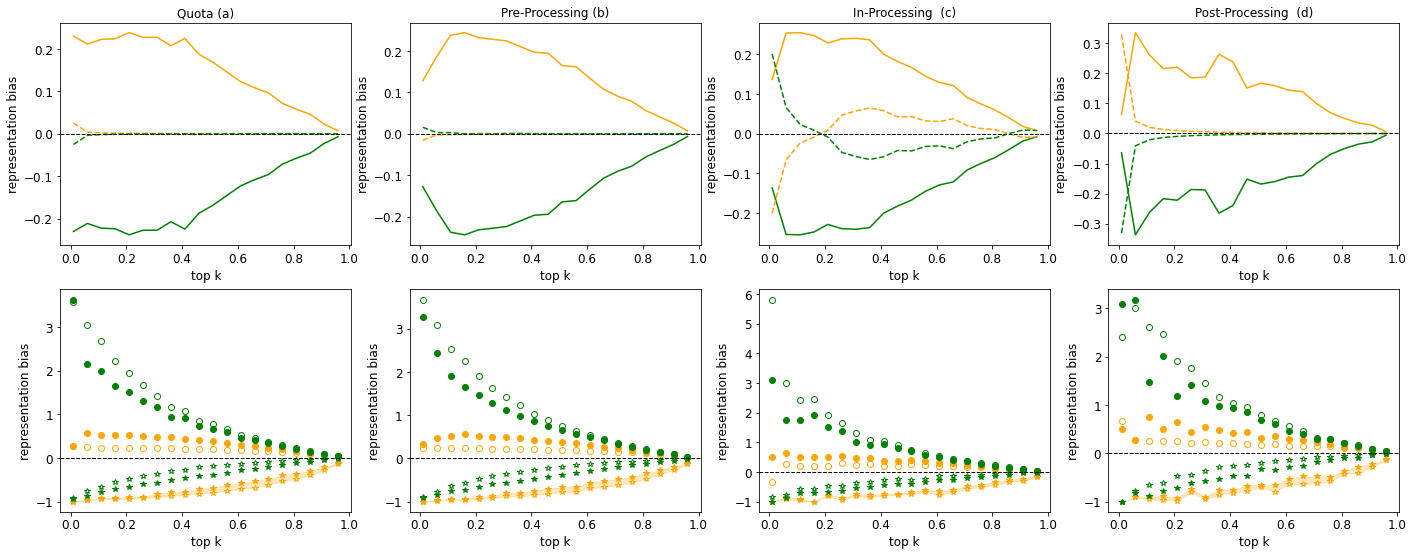

In [102]:
fig, axis = plt.subplots(nrows=2, ncols=4, figsize=(24, 9))

titles = ['Quota (a)', 'Pre-Processing (b)', 'In-Processing  (c)', 'Post-Processing  (d)']

for i in range(4):
    plot_aggregated(titles[i], axis[0][i], res[i]['agg'])
    plot_disaggregated(axis[1][i], res[i]['diss_agg'])

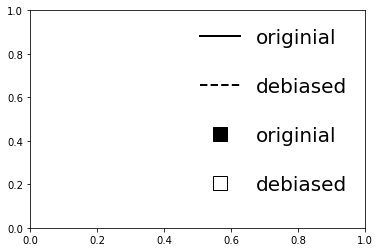

In [100]:
colors = ['black', 'black']
line = []
lines = [
    Line2D([0], [0], color='black', linewidth=2, linestyle='-', markersize=14),
    Line2D([0], [0], color='black', linewidth=2, linestyle='--', markersize=14),
    Line2D([0], [0], color='black', linewidth=0, marker='s', fillstyle='full', markersize=14),
    Line2D([0], [0], color='black', linewidth=0, marker='s', fillstyle='none', markersize=14)
]
labels = ['originial', 'debiased', 'originial', 'debiased']
plt.legend(lines, labels, loc=1, prop={'size': 20}, labelspacing=1.5, edgecolor='none')
plt.show()